In [6]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed #pip installed ipywdigets in Terminal
import ipywidgets as widgets

# Let's clean it up 🧽

We pulled the Dataset downloaded from Kaggle (https://www.kaggle.com/jboysen/mri-and-alzheimers). The Datasets have been released as part of OASIS and open-source project aiming to clarify and encourage new discoveries in Alzheimers. The data has been collected by HHMI (Hughes Howard's Medical Institute, University of Washington and Harvard University)

### Cross-Sectional Data


**Cross-Section**, in other words, the plane that consists of the Sagital and Frontal axes.

**1** : We pulled the data. The columns `hand` and `delay` have been removed since the former column only contains right handed people and the latter column does not contribute to the classification or analysis of Alzheimers. Delay is only a technical note about when the data has been processed after the scan.

In [7]:
#pull data
cs = pd.read_csv('oasis_cross-sectional.csv')
cs = cs.drop(['Hand', 'Delay'], axis=1)
cs.head(5)

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,OAS1_0004_MR1,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,OAS1_0005_MR1,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


## Cleaning

The Data have been cleaned, in other words, the redundant columns have been removed. Now we are replacing the `NaN` values by the median. This is very common practice and will help us to buffer for extreme variation, if applicable. The columns that have been cleaned are **`Educ`, `SES`, `MMSE` and `CDR`.** For more information, please read `Phase 0`. Additionally, we have made sure that all values are numerical now; this includes **`M/F`**.

In [8]:
#fill NA values w median values
cs["Educ"] = cs["Educ"].fillna(cs["Educ"].median())
cs["SES"] = cs["SES"].fillna(cs["SES"].median())
cs["MMSE"] = cs["MMSE"].fillna(cs["MMSE"].median())
cs["CDR"] = cs["CDR"].fillna(cs["CDR"].median())

#change categorical variable age to numercail
# M --> 0, F --> 1
cs["M/F"] = cs["M/F"].map(dict({"M": 0, "F": 1}))
cs.head()

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,1,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,1,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,1,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,OAS1_0004_MR1,0,28,3.0,2.0,29.0,0.0,1588,0.803,1.105
4,OAS1_0005_MR1,0,18,3.0,2.0,29.0,0.0,1737,0.848,1.010


* `0` = Male
* `1` = Female

In [9]:
CrossSectionCleaned = cs.drop(columns = ['ID'])
CrossSectionCleaned.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,1,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,1,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,0,28,3.0,2.0,29.0,0.0,1588,0.803,1.105
4,0,18,3.0,2.0,29.0,0.0,1737,0.848,1.010


In [10]:
csgroup1 = cs.groupby("M/F").agg(np.mean)
csgroup1.head(5)

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
M/F,,,,,,,,
0,48.148810,3.142857,2.172619,28.041667,0.157738,1592.410714,0.791452,1.109821
1,53.369403,3.067164,2.287313,27.902985,0.151119,1412.656716,0.791806,1.254731


### Bias?

There does not seem to be a bias between men and female (except for `age`). All variables seem to lie close to each other. The dataset, therefore, is representative and can be used to analyze the data.


In [11]:
print('There is data from ' + str(cs.shape[0]) + ' patients in this set.')

There is data from 436 patients in this set.


### Longitudinal Data


**Longitudinal**, in other words, data collected in the saggital plane.

In [12]:
#pulling the data from csv... drop hand as redundant
lg = pd.read_csv('oasis_longitudinal.csv')
lg = lg.drop('Hand', axis=1)
lg = lg.drop('MR Delay', axis=1)
lg = lg.drop('MRI ID', axis=1)

#going to fill in NA values with the median.. #of NA values too significant to get rid of 
lg["Educ"] = lg["EDUC"].fillna(lg["EDUC"].median())
lg["SES"] = lg["SES"].fillna(lg["SES"].median())
lg["MMSE"] = lg["MMSE"].fillna(lg["MMSE"].median())
lg["CDR"] = lg["CDR"].fillna(lg["CDR"].median())
#change gender M F values to integer values
# M --> 0, F --> 1
lg["M/F"] = lg["M/F"].map(dict({"M": 0, "F": 1}))

lg.head()

,Subject ID,Group,Visit,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Educ
0,OAS2_0001,Nondemented,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,14
1,OAS2_0001,Nondemented,2,0,88,14,2.0,30.0,0.0,2004,0.681,0.876,14
2,OAS2_0002,Demented,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046,12
3,OAS2_0002,Demented,2,0,76,12,2.0,28.0,0.5,1738,0.713,1.010,12
4,OAS2_0002,Demented,3,0,80,12,2.0,22.0,0.5,1698,0.701,1.034,12


Same columns have been dropped and cleaned similar to what we did to the cross-sectional dataset. It is worht noting that this table is larger than the one before, since we have extra columns. In addition to this, this DataFrame has a time component to it (Visit) for the same people so we can track the development of the disease.

`Group` 
- `Demented` : Alzheimers
- `Nondemented` : No-Alzheimers
- `Converted` : Developed Alzheimers during the study

In [13]:
lggroup2 = lg.groupby("M/F").agg(np.mean)
lggroup2

,Visit,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Educ
M/F,,,,,,,,,,
0,1.956250,76.681250,14.893750,2.375000,26.637500,0.378125,1604.331250,0.718888,1.106094,14.893750
1,1.826291,77.262911,14.375587,2.483568,27.887324,0.225352,1400.840376,0.737592,1.262592,14.375587


Again, no selection bias since all values lie pretty close to each other irrespective of whether they are sick or not or any other variables. :)

In [14]:
lggroup1 = lg.groupby("Group").agg(np.mean)
lggroup1.head()

,Visit,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Educ
Group,,,,,,,,,,,
Converted,2.027027,0.648649,79.756757,15.459459,1.729730,28.675676,0.256757,1459.270270,0.723730,1.212405,15.459459
Demented,1.732877,0.410959,76.260274,13.671233,2.671233,24.575342,0.671233,1485.849315,0.716301,1.196890,13.671233
Nondemented,1.968421,0.678947,77.057895,15.142105,2.394737,29.226316,0.005263,1495.500000,0.740900,1.191063,15.142105


In [15]:
print('There is data from ' + str(lg.shape[0]) + ' patients in this set.')

There is data from 373 patients in this set.


# Trends

In [16]:
def standard_units(data):
    avg = np.average(data)
    stddev = np.std(data)
    return (data - avg) / stdev

In [17]:
def correlation(x, y):
    stdx = standard_units(x)
    stdy = standard_units(y)
    return np.mean(stdx * stdy)

## Age and CDR

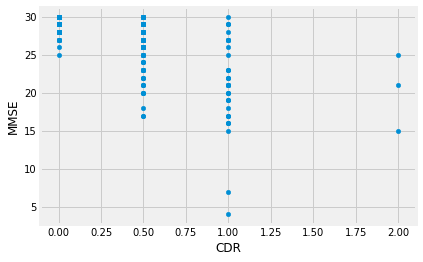

In [18]:
lg.plot.scatter(x='CDR', y = 'MMSE')